In [ ]:
# import packages
import requests
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
# a function to extract the sources we will work on english ones
def getSources():
    source_url = 'https://newsapi.org/v1/sources?language=en'
    response = requests.get(source_url).json()
    sources = []
    for source in response['sources']:
        sources.append(source['id'])
    return sources

In [ ]:
# Checking the news sources we have and the length of the sources.
sources = getSources()
print('number of sources :', len(sources))
print('sources :', sources)

number of sources : 60
sources : ['abc-news-au', 'al-jazeera-english', 'ars-technica', 'associated-press', 'bbc-news', 'bbc-sport', 'bloomberg', 'breitbart-news', 'business-insider', 'business-insider-uk', 'buzzfeed', 'cnbc', 'cnn', 'daily-mail', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'financial-times', 'football-italia', 'fortune', 'four-four-two', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'independent', 'mashable', 'metro', 'mirror', 'mtv-news', 'mtv-news-uk', 'national-geographic', 'new-scientist', 'newsweek', 'new-york-magazine', 'nfl-news', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'talksport', 'techcrunch', 'techradar', 'the-economist', 'the-guardian-au', 'the-guardian-uk', 'the-hindu', 'the-huffington-post', 'the-lad-bible', 'the-new-york-times', 'the-next-web', 'the-sport-bible', 'the-telegraph', 'the-times-of-india', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'time', 'usa-today']


In [ ]:
# dictionary mapping the each source id from the list displayed above to the corresponding category
def mapping():
    d = {}
    response = requests.get('https://newsapi.org/v1/sources?language=en')
    response = response.json()
    for s in response['sources']:
        d[s['id']] = s['category']
    return d

In [ ]:
# Checking the category for talksport and the-guardian-uk, techcrunch, reuters.
m = mapping()
print('Category of talksport:', m['talksport'])
print('Category of the-guardian-uk:', m['the-guardian-uk'])
print('category of reuters:', m['reuters'])
print('category of techcrunch:', m['techcrunch'])

Category of talksport: sports
Category of the-guardian-uk: general
category of reuters: general
category of techcrunch: technology


In [ ]:
# checking what type of categories we have .
print('Categories:', list(set(m.values())))

Categories: ['general', 'science', 'technology', 'sports', 'entertainment', 'business']


In [ ]:
%matplotlib inline
# pandas for data manipulation
import pandas as pd
pd.options.mode.chained_assignment = None
# nltk for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# list of stopwords like articles, preposition
stop = set(stopwords.words('english'))
from string import punctuation
from collections import Counter
import re
import numpy as np

In [ ]:
data = pd.read_csv('./news.csv')

In [ ]:
data.head()

,author,description,publishedAt,source,title,url,urlToImage,category,scraping_date
0,http://www.abc.net.au/news/lisa-millar/166890,In the month following Donald Trump's inaugura...,2017-02-26T08:08:20Z,abc-news-au,Has Russia changed its tone towards Donald Trump?,http://www.abc.net.au/news/2017-02-26/donald-t...,http://www.abc.net.au/news/image/8300726-1x1-7...,general,2017-02-26 13:08:22.317772
1,http://www.abc.net.au/news/emily-sakzewski/768...,A fasting diet could reverse diabetes and repa...,2017-02-26T04:39:24Z,abc-news-au,Fasting diet 'could reverse diabetes and regen...,http://www.abc.net.au/news/2017-02-26/fasting-...,http://www.abc.net.au/news/image/8304732-1x1-7...,general,2017-02-26 13:08:22.317772
2,http://www.abc.net.au/news/jackson-vernon/7531870,Researchers discover what could be one of the ...,2017-02-26T02:02:28Z,abc-news-au,Mine pollution turning Blue Mountains river in...,http://www.abc.net.au/news/2017-02-26/blue-mou...,http://www.abc.net.au/news/image/8304524-1x1-7...,general,2017-02-26 13:08:22.317772
3,http://www.abc.net.au/news/sophie-mcneill/4516794,Yemen is now classified as the world's worst h...,2017-02-26T09:56:12Z,abc-news-au,Australia ignores unfolding humanitarian catas...,http://www.abc.net.au/news/2017-02-26/humanita...,http://www.abc.net.au/news/image/7903812-1x1-7...,general,2017-02-26 13:08:22.317772
4,http://www.abc.net.au/news/dan-conifer/5189074...,Malcolm Turnbull and Joko Widodo hold talks in...,2017-02-26T03:43:04Z,abc-news-au,Australia and Indonesia agree to fully restore...,http://www.abc.net.au/news/2017-02-26/indonesi...,http://www.abc.net.au/news/image/8304516-1x1-7...,general,2017-02-26 13:08:22.317772


In [ ]:
# 33022 rows and 9 columns 
print('data shape:', data.shape)

data shape: (33022, 9)


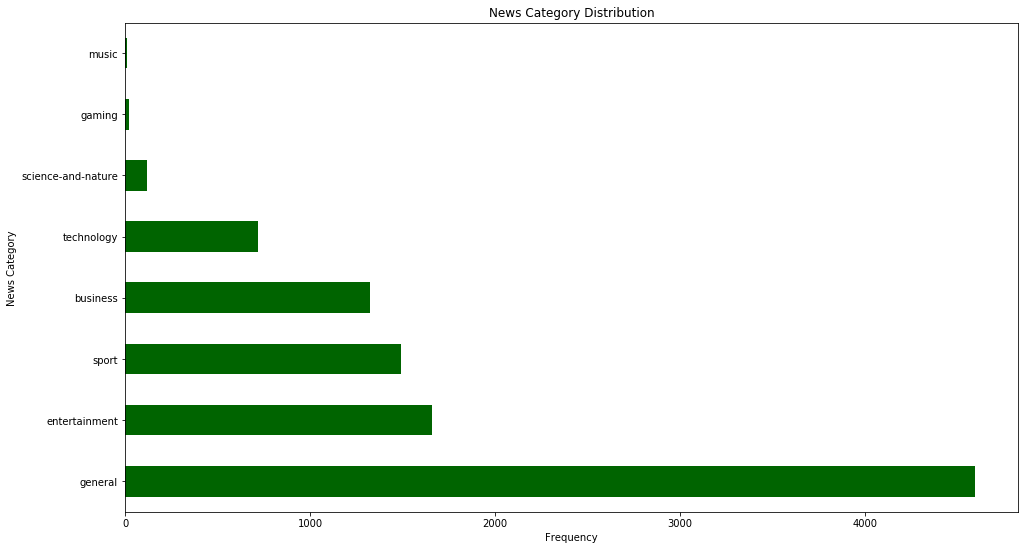

In [ ]:
fig, ax   = plt.subplots()
data.category.value_counts().plot(kind = 'barh', grid = False, figsize = (16,9),color = 'darkgreen')
ax.set_xlabel('Frequency')
ax.set_ylabel('News Category')
ax.set_title('News Category Distribution')
fig.savefig('categoryfinal2.png', bbox_inches='tight')
plt.show()

In [ ]:
# remove duplicate description columns 
data = data.drop_duplicates('description')

In [ ]:
# remove rows with empty descriptions 
data = data[~data['description'].isnull()]


In [ ]:
data.shape

(29638, 9)

In [ ]:
data['len'] = data['description'].map(len)

In [ ]:
data = data[data.len > 140]
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis = 1)

In [ ]:
data.shape

(9944, 10)

In [ ]:
def tokenizer(text):
    try:
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]
        
        tokens = []
        for tokens_by_sent in tokens_:
            tokens += tokens_by_sent
            
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        tokens = list(filter(lambda t: t not in punctuation, tokens))
        tokens = list(filter(lambda t: t not in [u"'s", u"n't", u"...", u"''", u'``', 
                                            u'\u2014', u'\u2026', u'\u2013'],tokens))
        
        filtered_tokens = []
        for token in tokens:
            if re.search('[a-zA-z]', token):
                filtered_tokens.append(token)
                
        filtered_tokens = list(map(lambda token: token.lower(), filtered_tokens))
        return filtered_tokens
    except Error as e :
        print(e)
    

In [ ]:
data['tokens'] = data['description'].map(tokenizer)

In [ ]:
# description of the first 10.
for descripition, tokens in zip(data['description'].head(10), data['tokens'].head(10)):
    print('description:', descripition)
    print('tokens:', tokens)
    print()

description: Researchers discover what could be one of the worst cases of mine pollution in the world in the heart of New South Wales' pristine heritage-listed Blue Mountains.
tokens: ['researchers', 'discover', 'could', 'one', 'worst', 'cases', 'mine', 'pollution', 'world', 'heart', 'new', 'south', 'wales', 'pristine', 'heritage-listed', 'blue', 'mountains']

description: Malcolm Turnbull and Joko Widodo hold talks in Sydney, reviving cooperation halted after the discovery of insulting posters at a military base, and reaching deals on trade and a new consulate in east Java.
tokens: ['malcolm', 'turnbull', 'joko', 'widodo', 'hold', 'talks', 'sydney', 'reviving', 'cooperation', 'halted', 'discovery', 'insulting', 'posters', 'military', 'base', 'reaching', 'deals', 'trade', 'new', 'consulate', 'east', 'java']

description: KUALA LUMPUR, Malaysia (AP) — Malaysia's health minister said Sunday that the dose of nerve agent given to North Korean ruler Kim Jong Un's exiled half brother was so 

In [ ]:
def keywords(category):
    tokens = data[data['category'] == category]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(20)

In [ ]:
for category in set(data['category']):
    print('category:', category)
    print('top 20 keywords:', keywords(category))
    print('---')

category: general
top 20 keywords: [('trump', 1231), ('president', 1005), ('said', 844), ('donald', 652), ('new', 513), ('ap', 462), ('house', 408), ('u.s.', 400), ('people', 330), ('would', 327), ('government', 321), ('first', 313), ('state', 299), ('tuesday', 285), ('one', 283), ('minister', 281), ('two', 280), ('former', 276), ('may', 263), ('white', 262)]
---
category: music
top 20 keywords: [('break', 2), ('marnie', 2), ('lewis', 2), ('bloor', 2), ('twitter', 2), ('facial', 2), ('best', 2), ('years', 2), ('could', 2), ('simpson', 1), ('ongoing', 1), ('towie', 1), ('star', 1), ('calling', 1), ('ex-boyfriend', 1), ('aaron', 1), ('chalmers', 1), ('fight', 1), ('love', 1), ('cheat', 1)]
---
category: science-and-nature
top 20 keywords: [('could', 25), ('may', 16), ('people', 10), ('help', 10), ('million', 10), ('per', 8), ('us', 8), ('space', 8), ('life', 8), ('way', 8), ('health', 8), ('new', 8), ('cent', 7), ('children', 7), ('better', 7), ('big', 7), ('says', 6), ('time', 6), ('fir

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df is minimum number of documents that contain a term t
# max_features is maximum number of unique tokens (across documents) that we'd consider
# TfidfVectorizer preprocesses the descriptions using the tokenizer we defined above

vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1,2))
vz = vectorizer.fit_transform(list(data['description']))



In [ ]:
vz.shape

(9944, 4405)

In [ ]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

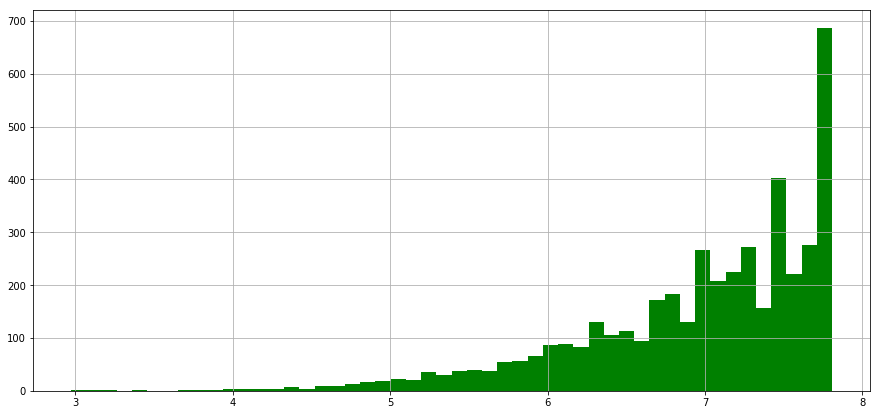

In [ ]:
# Visualizing the tfidf through histograms
tfidf.tfidf.hist(bins = 50, figsize=(15,7), color = 'green')

Displaying 40 tokens with lowest tfidf score

In [ ]:
tfidf.sort_values(by=['tfidf'], ascending = True).head(40)

,tfidf
trump,2.972815
president,3.114748
said,3.178398
new,3.240690
donald,3.412481
donald trump,3.432890
first,3.708050
one,3.712585
president donald,3.814585
u.s.,3.829800


In [ ]:
tfidf.sort_values(by=['tfidf'], ascending =False).head(40)

,tfidf
leave european,7.80693
contracts,7.80693
spoiler alert,7.80693
spicer said,7.80693
max allegri,7.80693
congressional republicans,7.80693
south australia,7.80693
sony,7.80693
contains major,7.80693
jury,7.80693


In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

In [ ]:
svd_tfidf.shape

(9944, 50)

Shape reduced to 50 lets reduce it til 2!

In [ ]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9944 samples in 0.023s...
[t-SNE] Computed neighbors for 9944 samples in 16.018s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9944
[t-SNE] Computed conditional probabilities for sample 2000 / 9944
[t-SNE] Computed conditional probabilities for sample 3000 / 9944
[t-SNE] Computed conditional probabilities for sample 4000 / 9944
[t-SNE] Computed conditional probabilities for sample 5000 / 9944
[t-SNE] Computed conditional probabilities for sample 6000 / 9944
[t-SNE] Computed conditional probabilities for sample 7000 / 9944
[t-SNE] Computed conditional probabilities for sample 8000 / 9944
[t-SNE] Computed conditional probabilities for sample 9000 / 9944
[t-SNE] Computed conditional probabilities for sample 9944 / 9944
[t-SNE] Mean sigma: 0.059996
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.472168
[t-SNE] Error after 1000 iterations: 1.632599


In [ ]:
tsne_tfidf.shape

(9944, 2)

Each description is now modeled by a two dimensional vector.



In [ ]:
tsne_tfidf

array([[ 56.25767517,  22.83657455],
       [  8.15200138, -53.29114914],
       [-18.15491295,  83.47897339],
       ..., 
       [  6.3757143 ,   1.5383358 ],
       [-23.21653748, -12.66177654],
       [ 26.07865143,  17.23973465]], dtype=float32)

In [ ]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

In [ ]:
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title='tf-idf clustering of the news',tools='pan,wheel_zoom,box_zoom,reset,hover,previewsave', x_axis_type=None, y_axis_type=None, min_border=1)

Loading BokehJS ...

In [ ]:
tfidf_df= pd.DataFrame(tsne_tfidf, columns=['x', 'y'])
tfidf_df['description'] = data['description']
tfidf_df['category'] = data['category']

Bokeh need a panda dataframe to be passed as a source data, this is a very elegant way to read data.

In [ ]:
plot_tfidf.scatter(x='x', y='y', source=tfidf_df, fill_color = 'pink')
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"description": "@description", "category":"@category"}
show(plot_tfidf)
fig.savefig('bokeh.png', bbox_inches = 'tight')


## Clustering

### KMeans

Our starting point is the tf-idf matrix vz. Lets check the size again.

In [ ]:
vz.shape

(9944, 4405)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.cluster import MiniBatchKMeans

num_clusters = 30
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)


In [ ]:
for (i, desc),category in zip(enumerate(data.description),data['category']):
    if(i < 5):
        print("Cluster " + str(kmeans_clusters[i]) + ": " + desc + 
              "(distance: " + str(kmeans_distances[i][kmeans_clusters[i]]) + ")")
        print('category: ',category)
        print('---')

Cluster 3: Researchers discover what could be one of the worst cases of mine pollution in the world in the heart of New South Wales' pristine heritage-listed Blue Mountains.(distance: 0.992929366612)
category:  general
---
Cluster 3: Malcolm Turnbull and Joko Widodo hold talks in Sydney, reviving cooperation halted after the discovery of insulting posters at a military base, and reaching deals on trade and a new consulate in east Java.(distance: 0.997530166902)
category:  general
---
Cluster 22: KUALA LUMPUR, Malaysia (AP) — Malaysia's health minister said Sunday that the dose of nerve agent given to North Korean ruler Kim Jong Un's exiled half brother was so high that it killed him within 20 minutes and caused…(distance: 0.911623152353)
category:  general
---
Cluster 22: HANOI, Vietnam (AP) — Two women — a Vietnamese and an Indonesian — have been arrested for allegedly coating their hands with the immensely toxic chemical agent VX and wiping them on the face of the North Korean leader

In [ ]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    aux = ''
    for j in sorted_centroids[i, :10]:
        aux += terms[j] + ' | '
    print(aux)
    print()

Cluster 0:
rapoport | ian rapoport | ian | nfl | nfl network | network | insider ian | insider | network insider | rapoport reported | 

Cluster 1:
president trump | president | trump | congress | address | tuesday | address congress | tuesday night | first | speech | 

Cluster 2:
quot | jeremy corbyn | corbyn | jeremy | labour | court | accused | said | warned | made | 

Cluster 3:
new | one | said | people | two | could | police | like | says | would | 

Cluster 4:
service | today | uber | company | launch | part | email | pence | amazon | president mike | 

Cluster 5:
team | lanka | sri lanka | sri | bangladesh | new | announced | coach | week | test | 

Cluster 6:
high | court | school | supreme court | supreme | high court | high school | case | winds | snow | 

Cluster 7:
minister | prime minister | prime | party | election | mark | dutch | rutte | modi | narendra | 

Cluster 8:
years | first | time | first time | company | ago | years ago | since | announced | two | 

Cluster 9:

In [ ]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9944 samples in 0.020s...
[t-SNE] Computed neighbors for 9944 samples in 6.002s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9944
[t-SNE] Computed conditional probabilities for sample 2000 / 9944
[t-SNE] Computed conditional probabilities for sample 3000 / 9944
[t-SNE] Computed conditional probabilities for sample 4000 / 9944
[t-SNE] Computed conditional probabilities for sample 5000 / 9944
[t-SNE] Computed conditional probabilities for sample 6000 / 9944
[t-SNE] Computed conditional probabilities for sample 7000 / 9944
[t-SNE] Computed conditional probabilities for sample 8000 / 9944
[t-SNE] Computed conditional probabilities for sample 9000 / 9944
[t-SNE] Computed conditional probabilities for sample 9944 / 9944
[t-SNE] Mean sigma: 0.007550
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.561630
[t-SNE] Error after 1000 iterations: 1.541555


In [ ]:
import numpy as np

colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5",
"#e3be38", "#4e2d7c", "#5fdfa8", "#d34690", "#3f6d31", "#d44427", "#7fcdd8", "#cb4053", "#5e9981",
"#803a62", "#9b9e39", "#c88cca", "#e1c37b", "#34223b", "#bdd8a3", "#6e3326", "#cfbdce", "#d07d3c",
"#52697d", "#7d6d33", "#d27c88", "#36422b", "#b68f79"])

plot_kmeans = bp.figure(plot_width=700, plot_height=600, title="KMeans clustering of the news",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)


In [ ]:
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['description'] = data['description']
kmeans_df['category'] = data['category']

## Latent Dirichlet Allocation (with Bokeh)

In [ ]:
import lda
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cvectorizer = CountVectorizer(min_df=4, max_features=10000, tokenizer=tokenizer, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(data['description'])

n_topics = 20
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

In [ ]:
n_top_words = 8
topic_summaries = []

topic_word = lda_model.topic_word_  # get the topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

In [ ]:
tsne_lda = tsne_model.fit_transform(X_topics)

In [ ]:
doc_topic = lda_model.doc_topic_
lda_keys = []
for i, tweet in enumerate(data['description']):
    lda_keys += [doc_topic[i].argmax()]

In [ ]:
plot_lda = bp.figure(plot_width=700, plot_height=600, title="LDA topic visualization",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

In [ ]:
lda_df = pd.DataFrame(tsne_lda, columns=['x','y'])
lda_df['description'] = data['description']
lda_df['category'] = data['category']

In [ ]:
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(int)

In [ ]:
plot_lda.scatter( x='x', y='y',source=lda_df, color=colormap[lda_keys])

hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips={"description":"@description", "topic":"@topic", "category":"@category"}
show(plot_lda)


## Visualization of the topic using pyLDAvis


In [ ]:
lda_df['len_docs'] = data['tokens'].map(len)

In [ ]:
def prepareLDAData():
    data = {
        'vocab': vocab,
        'doc_topic_dists': lda_model.doc_topic_,
        'doc_lengths': list(lda_df['len_docs']),
        'term_frequency':cvectorizer.vocabulary_,
        'topic_term_dists': lda_model.components_
    } 
    return data

In [ ]:
ldadata = prepareLDAData()

In [ ]:
import pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()

In [ ]:
prepared_data = pyLDAvis.prepare(**ldadata)

In [ ]:
pyLDAvis.save_html(prepared_data,'./pyldadavis.html')